# Configuring cuDNN on Colab for YOLOv4



In [ ]:
# CUDA: Let's check that Nvidia CUDA drivers are already pre-installed and which version is it.
!/usr/local/cuda/bin/nvcc --version
# We need to install the correct cuDNN according to this output

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
#take a look at the kind of GPU we have
!nvidia-smi

Fri Mar 22 05:00:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# This cell ensures you have the correct architecture for your respective GPU
# If you command is not found, look through these GPUs, find the respective
# GPU and add them to the archTypes dictionary

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# Tesla K80
# ARCH= -gencode arch=compute_37,code=sm_37

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, XNOR Tensor Cores
# ARCH= -gencode arch=compute_75,code=[sm_75,compute_75]

# Jetson XAVIER
# ARCH= -gencode arch=compute_72,code=[sm_72,compute_72]

# GTX 1080, GTX 1070, GTX 1060, GTX 1050, GTX 1030, Titan Xp, Tesla P40, Tesla P4
# ARCH= -gencode arch=compute_61,code=sm_61

# GP100/Tesla P100 - DGX-1
# ARCH= -gencode arch=compute_60,code=sm_60

# For Jetson TX1, Tegra X1, DRIVE CX, DRIVE PX - uncomment:
# ARCH= -gencode arch=compute_53,code=[sm_53,compute_53]

# For Jetson Tx2 or Drive-PX2 uncomment:
# ARCH= -gencode arch=compute_62,code=[sm_62,compute_62]
import os
os.environ['GPU_TYPE'] = str(os.popen('nvidia-smi --query-gpu=name --format=csv,noheader').read())

def getGPUArch(argument):
  try:
    argument = argument.strip()
    # All Colab GPUs
    archTypes = {
        "Tesla V100-SXM2-16GB": "-gencode arch=compute_70,code=[sm_70,compute_70]",
        "Tesla K80": "-gencode arch=compute_37,code=sm_37",
        "Tesla T4": "-gencode arch=compute_75,code=[sm_75,compute_75]",
        "Tesla P40": "-gencode arch=compute_61,code=sm_61",
        "Tesla P4": "-gencode arch=compute_61,code=sm_61",
        "Tesla P100-PCIE-16GB": "-gencode arch=compute_60,code=sm_60"

      }
    return archTypes[argument]
  except KeyError:
    return "GPU must be added to GPU Commands"
os.environ['ARCH_VALUE'] = getGPUArch(os.environ['GPU_TYPE'])

print("GPU Type: " + os.environ['GPU_TYPE'])
print("ARCH Value: " + os.environ['ARCH_VALUE'])

GPU Type: Tesla T4

ARCH Value: -gencode arch=compute_75,code=[sm_75,compute_75]


# คัดลอกข้อความใน ARCH Value: ไปวางต่อจาก บรรทัดที่ 22 ของไฟล์ Makefile ที่อยู่ใน Darknet <p>
# Ex. บรรทัดที่ 22 เป็น  -gencode arch=compute_61,code=[sm_61,compute_61] ต้องต่อด้วย '/' <p>
# เป็น -gencode arch=compute_61,code=[sm_61,compute_61] / <p>
# จากนั้นเว้นบรรทัด แล้วใส่ชื่อ ชื่อของสถาปัตย์กรรมเครื่องที่ได้ลงไป (เช่น  -gencode arch=compute_75,code=[sm_75,compute_75])

# Installing Darknet for YOLOv4 on Colab




In [ ]:
!git clone https://github.com/AlexeyAB/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.39 MiB | 12.54 MiB/s, done.
Resolving deltas: 100% (10666/10666), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile


/content/darknet


In [ ]:
# build darknet
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:

In [ ]:
!pwd

/content/darknet


# Set up Custom Dataset for YOLOv4

We'll use Roboflow to convert our dataset from any format to the YOLO Darknet format.

1. To do so, create a free [Roboflow account](https://app.roboflow.ai).
2. Upload your images and their annotations (in any format: VOC XML, COCO JSON, TensorFlow CSV, etc).
3. Apply preprocessing and augmentation steps you may like. We recommend at least `auto-orient` and a `resize` to 416x416. Generate your dataset.
4. Export your dataset in the **YOLO Darknet format**.
5. Copy your download link, and paste it below.

See our [blog post](https://blog.roboflow.ai/training-yolov4-on-a-custom-dataset/) for greater detail.

In this example, I used the open source [BCCD Dataset](https://public.roboflow.ai/object-detection/bccd). (You can `fork` it to your Roboflow account to follow along.)

In [ ]:
%cd /content/darknet/

/content/darknet


In [ ]:
!pwd

/content/darknet


In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="xvy4LlsPYGtjEzswFIoP")
project = rf.workspace("pigeondt").project("pigeondetection_4_wihtout_bw_img")
version = project.version(5)
dataset = version.download("darknet")






loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to LaserPigeonDeterrent-15 in darknet:: 100%|██████████| 72/72 [00:00<00:00, 4475.52it/s]


In [ ]:
!mkdir  /content/darknet/data

In [ ]:
#Set up training file directories for custom dataset
%cd /content/darknet/
%cp {dataset.location}/train/_darknet.labels data/obj.names
%cp {dataset.location}/train/_darknet.labels data/coco.names

%mkdir data/obj
#copy image and labels
%cp {dataset.location}/train/*.jpg data/obj/
%cp {dataset.location}/valid/*.jpg data/obj/

%cp {dataset.location}/train/*.txt data/obj/
%cp {dataset.location}/valid/*.txt data/obj/

with open('data/obj.data', 'w') as out:
  out.write('classes = 1\n')
  out.write('train = data/train.txt\n')
  out.write('valid = data/valid.txt\n')
  out.write('names = data/obj.names\n')
  out.write('backup = /content/drive/MyDrive/Project1/yoloTiny/yoloModel/yoloNewer')  #  /// where you want to save model

#write train file (just the image list)
import os

with open('data/train.txt', 'w') as out:
  for img in [f for f in os.listdir(dataset.location + '/train') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

#write the valid file (just the image list)
import os

with open('data/valid.txt', 'w') as out:
  for img in [f for f in os.listdir(dataset.location + '/valid') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

/content/darknet


# Write Custom Training Config for YOLOv4

In [ ]:
#we build config dynamically based on number of classes
#we build iteratively from base config files. This is the same file shape as cfg/yolo-obj.cfg
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len(dataset.location + '/train/_darknet.labels')
#max_batches = num_classes*2000
max_batches = 3000
steps1 = .8 * max_batches
steps2 = .9 * max_batches
steps_str = str(steps1)+','+str(steps2)
num_filters = (num_classes + 5) * 3


print("writing config for a custom YOLOv4 detector detecting number of classes: " + str(num_classes))

#Instructions from the darknet repo
#change line max_batches to (classes*2000 but not less than number of training images, and not less than 6000), f.e. max_batches=6000 if you train for 3 classes
#change line steps to 80% and 90% of max_batches, f.e. steps=4800,5400
if os.path.exists('./cfg/custom-yolov7-tiny-detector.cfg'): os.remove('./cfg/custom-yolov7-tiny-detector.cfg')


#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

writing config for a custom YOLOv4 detector detecting number of classes: 1


In [ ]:
!cp /content/darknet/cfg/yolov7-tiny.cfg /content/darknet/cfg/custom-yolov7-tiny-detector.cfg

In [ ]:
%%writetemplate ./cfg/custom-yolov7-tiny-detector.cfg
[net]
# Testing
#batch=1
#subdivisions=1
# Training
batch=64
subdivisions=1
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.00261
burn_in=200

max_batches = {max_batches}
policy=steps
steps={steps_str}
scales=.1,.1

# 0
[convolutional]
batch_normalize=1
filters=32
size=3
stride=2
pad=1
activation=leaky

# 1
[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[route]
layers=-2

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -5,-3,-2,-1

# 8
[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[route]
layers=-2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -5,-3,-2,-1

# 16
[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[route]
layers=-2

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -5,-3,-2,-1

# 24
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[route]
layers=-2

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -5,-3,-2,-1

# 32
[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=leaky


##################################

### SPPCSP ###
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

### SPP ###
[maxpool]
stride=1
size=5

[route]
layers=-2

[maxpool]
stride=1
size=9

[route]
layers=-4

[maxpool]
stride=1
size=13

[route]
layers=-1,-3,-5,-6
### End SPP ###

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -10,-1

# 44
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky
### End SPPCSP ###

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[upsample]
stride=2

[route]
layers = 24

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -1,-3

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[route]
layers=-2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -5,-3,-2,-1

# 56
[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[upsample]
stride=2

[route]
layers = 16

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -1,-3

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[route]
layers=-2

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -5,-3,-2,-1

# 68
[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

##########################

[convolutional]
batch_normalize=1
size=3
stride=2
pad=1
filters=128
activation=leaky

[route]
layers = -1,56

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[route]
layers=-2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -5,-3,-2,-1

# 77
[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=2
pad=1
filters=256
activation=leaky

[route]
layers = -1,44

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[route]
layers=-2

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -5,-3,-2,-1

# 86
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

#############################

# ============ End of Neck ============ #

# ============ Head ============ #


# P3
[route]
layers = 68

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=128
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
#activation=linear
activation=logistic

[yolo]
mask = 0,1,2
anchors = 10,13, 16,30, 33,23, 30,61, 62,45, 59,119, 116,90, 156,198, 373,326
classes=1
num=9
jitter=.1
scale_x_y = 2.0
objectness_smooth=1
ignore_thresh = .7
truth_thresh = 1
#random=1
resize=1.5
iou_thresh=0.2
iou_normalizer=0.05
cls_normalizer=0.5
obj_normalizer=1.0
iou_loss=ciou
nms_kind=diounms
beta_nms=0.6
new_coords=1
max_delta=2


# P4
[route]
layers = 77

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
#activation=linear
activation=logistic

[yolo]
mask = 3,4,5
anchors = 10,13, 16,30, 33,23, 30,61, 62,45, 59,119, 116,90, 156,198, 373,326
classes=1
num=9
jitter=.1
scale_x_y = 2.0
objectness_smooth=1
ignore_thresh = .7
truth_thresh = 1
#random=1
resize=1.5
iou_thresh=0.2
iou_normalizer=0.05
cls_normalizer=0.5
obj_normalizer=1.0
iou_loss=ciou
nms_kind=diounms
beta_nms=0.6
new_coords=1
max_delta=2


# P5
[route]
layers = 86

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=512
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
#activation=linear
activation=logistic

[yolo]
mask = 6,7,8
anchors = 10,13, 16,30, 33,23, 30,61, 62,45, 59,119, 116,90, 156,198, 373,326
classes=1
num=9
jitter=.1
scale_x_y = 2.0
objectness_smooth=1
ignore_thresh = .7
truth_thresh = 1
#random=1
resize=1.5
iou_thresh=0.2
iou_normalizer=0.05
cls_normalizer=0.5
obj_normalizer=1.0
iou_loss=ciou
nms_kind=diounms
beta_nms=0.6
new_coords=1
max_delta=2


In [ ]:
%cat cfg/custom-yolov7-detector.cfg


[net]
batch=128
subdivisions=32
# Training
#width=512
#height=512
width=608
height=608
channels=3
momentum=0.949
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.00285
burn_in=1000
max_batches = 2500
policy=steps
steps=2000.0,2250.0
scales=.1,.1

#cutmix=1
mosaic=1

#:104x104 54:52x52 85:26x26 104:13x13 for 416

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=mish

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mis

In [ ]:
# @title ข้อความอธิบายภาพเริ่มต้น
%%writetemplate ./cfg/custom-yolov4-detector.cfg
[net]
# Testing
#batch=1
#subdivisions=1
# Training
batch=64  #1024
subdivisions=64 #8  #32
width=640
height=640
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.01 #0.00261
burn_in=250 #1000
max_batches = {max_batches}
policy=steps
steps={steps_str}
scales=.1,.1

mosaic=1

letter_box=1

ema_alpha=0.9998

#optimized_memory=1


# ============ Backbone ============ #

# Stem

# 0
[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=mish

# P1

# Downsample

[convolutional]
batch_normalize=1
filters=32
size=3
stride=2
pad=1
activation=mish

# Residual Block

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=mish

# 4 (previous+1+3k)
[shortcut]
from=-3
activation=linear

# P2

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=mish

# Split

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=mish

# Residual Block

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

# Transition first

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=mish

# Merge [-1, -(3k+4)]

[route]
layers = -1,-7

# Transition last

# 14 (previous+7+3k)
[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

# P3

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=mish

# Split

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

# Residual Block

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

# Transition first

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

# Merge [-1 -(4+3k)]

[route]
layers = -1,-7

# Transition last

# 24 (previous+7+3k)
[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

# P4

# Downsample

[convolutional]
batch_normalize=1
filters=256
size=3
stride=2
pad=1
activation=mish

# Split

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

# Residual Block

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

# Transition first

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

# Merge [-1 -(3k+4)]

[route]
layers = -1,-7

# Transition last

# 34 (previous+7+3k)
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

# P5

# Downsample

[convolutional]
batch_normalize=1
filters=512
size=3
stride=2
pad=1
activation=mish

# Split

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

# Residual Block

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

# Transition first

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

# Merge [-1 -(3k+4)]

[route]
layers = -1,-7

# Transition last

# 44 (previous+7+3k)
[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=mish

# ============ End of Backbone ============ #

# ============ Neck ============ #

# CSPSPP

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

### SPP ###
[maxpool]
stride=1
size=5

[route]
layers=-2

[maxpool]
stride=1
size=9

[route]
layers=-4

[maxpool]
stride=1
size=13

[route]
layers=-1,-3,-5,-6
### End SPP ###

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=mish

[route]
layers = -1, -11

# 57 (previous+6+5+2k)
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

# End of CSPSPP


# FPN-4

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[upsample]
stride=2

[route]
layers = 34

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[route]
layers = -1, -3

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

# Split

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=128
activation=mish

# Merge [-1, -(2k+2)]

[route]
layers = -1, -4

# Transition last

# 69 (previous+6+4+2k)
[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish


# FPN-3

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[upsample]
stride=2

[route]
layers = 24

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[route]
layers = -1, -3

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

# Split

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=64
activation=mish

# Merge [-1, -(2k+2)]

[route]
layers = -1, -4

# Transition last

# 81 (previous+6+4+2k)
[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish


# PAN-4

[convolutional]
batch_normalize=1
size=3
stride=2
pad=1
filters=128
activation=mish

[route]
layers = -1, 69

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

# Split

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=128
activation=mish

[route]
layers = -1,-4

# Transition last

# 90 (previous+3+4+2k)
[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish


# PAN-5

[convolutional]
batch_normalize=1
size=3
stride=2
pad=1
filters=256
activation=mish

[route]
layers = -1, 57

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

# Split

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=mish

[route]
layers = -1,-4

# Transition last

# 99 (previous+3+4+2k)
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

# ============ End of Neck ============ #

# ============ Head ============ #

# YOLO-3

[route]
layers = 81

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=128
activation=mish

[convolutional]
size=1
stride=1
pad=1
filters=255
activation=logistic

[yolo]
mask = 0,1,2
anchors = 12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401
classes={num_classes}
num=9
jitter=.1
scale_x_y = 2.0
objectness_smooth=1
ignore_thresh = .7
truth_thresh = 1
#random=1
resize=1.5
#iou_thresh=0.2
iou_normalizer=0.05
cls_normalizer=0.5
obj_normalizer=0.4
iou_loss=ciou
nms_kind=diounms
beta_nms=0.6
new_coords=1
max_delta=2


# YOLO-4

[route]
layers = 90

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=mish

[convolutional]
size=1
stride=1
pad=1
filters=255
activation=logistic

[yolo]
mask = 3,4,5
anchors = 12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401
classes={num_classes}
num=9
jitter=.1
scale_x_y = 2.0
objectness_smooth=1
ignore_thresh = .7
truth_thresh = 1
#random=1
resize=1.5
#iou_thresh=0.2
iou_normalizer=0.05
cls_normalizer=0.5
obj_normalizer=0.4
iou_loss=ciou
nms_kind=diounms
beta_nms=0.6
new_coords=1
max_delta=2


# YOLO-5

[route]
layers = 99

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=512
activation=mish

[convolutional]
size=1
stride=1
pad=1
filters=255
activation=logistic

[yolo]
mask = 6,7,8
anchors = 12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401
classes={num_classes}
num=9
jitter=.1
scale_x_y = 2.0
objectness_smooth=1
ignore_thresh = .7
truth_thresh = 1
#random=1
resize=1.5
#iou_thresh=0.2
iou_normalizer=0.05
cls_normalizer=0.5
obj_normalizer=0.4
iou_loss=ciou
nms_kind=diounms
beta_nms=0.6
new_coords=1
max_delta=2

# Train Custom YOLOv4 Detector

In [ ]:
!./darknet detector train data/obj.data /content/darknet/cfg/custom-yolov7-tiny-detector.cfg /content/darknet/yolov7-tiny.conv.87 -map -dont_show
#If you get CUDA out of memory adjust subdivisions above!
#adjust max batches down for shorter training above

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000033, iou_loss = 0.000000, total_loss = 0.000033 
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 98 Avg (IOU: 0.000000), count: 1, class_loss = 0.000138, iou_loss = 0.000000, total_loss = 0.000138 
 total_bbox = 667444, rewritten_bbox = 1.840154 % 

 (next mAP calculation at 1700 iterations) 

 Tensor Cores are used.
 Last accuracy mAP@0.50 = 51.73 %, best = 51.73 % 1669/3000: loss=0.4 map=0.52 best=0.52 hours left=0.4
 1669: 0.366019, 0.453591 avg loss, 0.026100 rate, 0.783041 seconds, 106816 images, 0.372263 hours left
Loaded: 0.000083 seconds
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 90 Avg (IOU: 0.850839), count: 391, class_loss = 1.236608, iou_loss = 48.853897, total_loss = 50.090504 
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 94 Avg (IOU: 

In [ ]:
!./darknet detector train data/obj.data /content/darknet/cfg/custom-yolov4-tiny-detector.cfg /content/darknet/backup/custom-yolov4-tiny-detector_last.weights  -map -dont_show

# Infer Custom Objects with Saved YOLOv4 Weights

In [ ]:
!./darknet detector map data/obj.data /content/darknet/cfg/custom-yolov7-tiny-detector.cfg /content/darknet/backup/yoloTiny/yoloModel/yoloNewer/custom-yolov7-tiny-detector_best.weights -show_imgs | tee results.log

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 OpenCV version:  CUDNN_HALF=1 
4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     32       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  32 0.044 BF
   3 route  1 		                           ->  104 x 104 x  64 
   4 conv     32       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  32 0.044 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   7 route  2 4 5 6 	                   ->  104 x 104 x 128 
   8 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   9 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.0

In [ ]:
!cp /content/darknet/results.log /content/darknet/results.log

In [ ]:
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
!cp /content/darknet/chart.png /content/darknet/chart.png

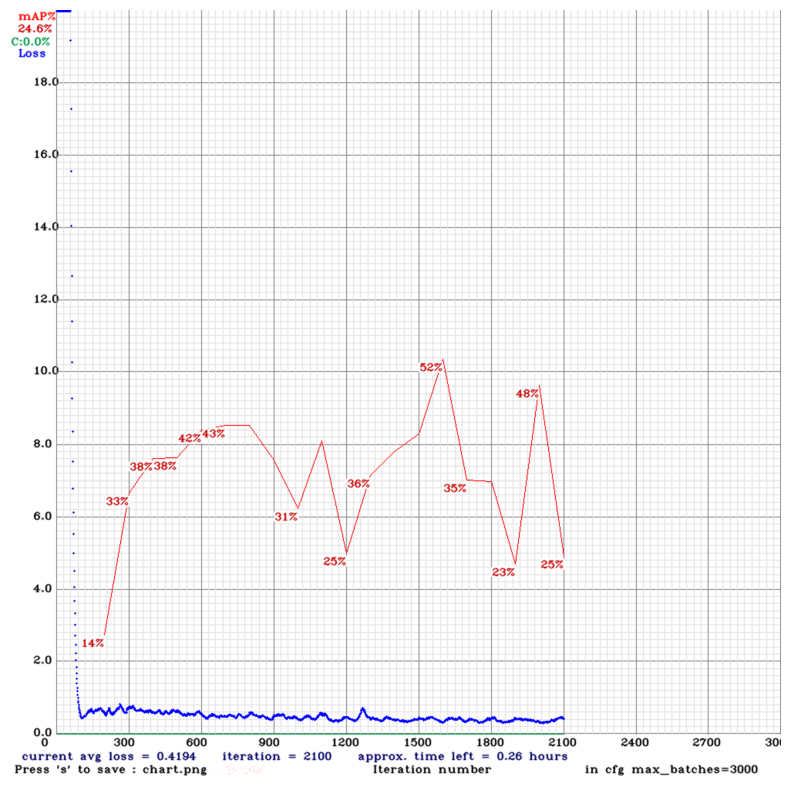

In [ ]:
imShow('chart.png')

In [ ]:
#check if weigths have saved yet
#backup houses the last weights for our detector
#(file yolo-obj_last.weights will be saved to the build\darknet\x64\backup\ for each 100 iterations)
#(file yolo-obj_xxxx.weights will be saved to the build\darknet\x64\backup\ for each 1000 iterations)
#After training is complete - get result yolo-obj_final.weights from path build\darknet\x64\bac
!ls backup
#if it is empty you haven't trained for long enough yet, you need to train for at least 100 iterations

custom-yolov4-tiny-detector_last.weights


In [ ]:
#coco.names is hardcoded somewhere in the detector
%cp data/obj.names data/coco.names

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp data/obj.names /content/drive/MyDrive/Project1/yoloTiny/yoloModel/yoloNewer/coco.names


In [ ]:
!cp data/obj.names /content/drive/MyDrive/Project1/yoloTiny/yoloModel/yoloNewer/obj.names

In [ ]:
!cp data/obj.data /content/drive/MyDrive/Project1/yoloTiny/yoloModel/yoloNewer/obj.data


In [ ]:
!cp /content/darknet/cfg/custom-yolov7-tiny-detector.cfg /content/drive/MyDrive/Project1/yoloTiny/yoloModel/yoloNewer/custom-yolov7-tiny-detector.cfg

In [ ]:
!cp /content/darknet/backup/custom-yolov4-tiny-detector_best.weights /content/drive/MyDrive/Project1/yoloTiny/yoloModel/vf/custom-yolov4-tiny-detector_best.weights

In [ ]:
!cp /content/darknet/backup/custom-yolov4-tiny-detector_last.weights /content/drive/MyDrive/Project1/yoloTiny/yoloModel/yoloNewer/custom-yolov4-tiny-detector_last.weights



In [ ]:
!cp /content/darknet/data/obj.names /content/darknet/data/coco.names

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     32       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  32 0.044 BF
   3 route  1 		                           ->  104 x 104 x  64 
   4 conv     32       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  32 0.044 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   7 route  2 4 5 6 	                   ->  104 x 104 x 128 
   8 conv     64       1 x

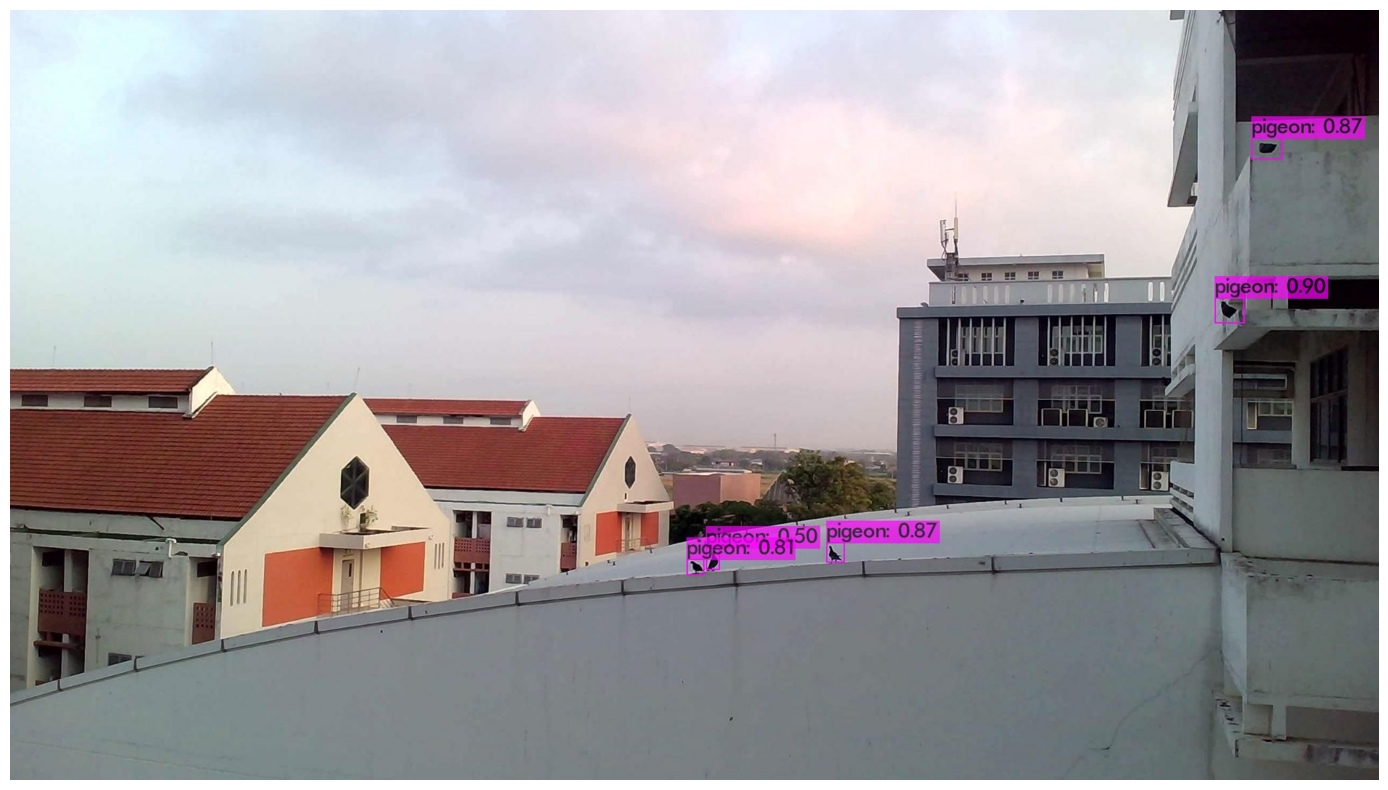

In [ ]:
#/test has images that we can test our detector on
#test_path = "/content/darknet/LaserPigeonDeterrent-4/test/"
#test_images = [f for f in os.listdir(test_path) if f.endswith('.jpg')]
#import random
#img_path = test_path + random.choice(test_images);
img_path = "/content/darknet/LaserPigeonDeterrent-13/train/2024-03-15-063248-frame-at-1m50s_jpg.rf.237e0095adea076f20f92436dfec8f2b.jpg"
imgPath = '/content/darknet/LaserPigeonDeterrent-15/train/170964184917sd9_jpg.rf.4ba1c415482b75d093b53c434c8f2e95.jpg'


#test out our detector!
!./darknet detect /content/darknet/cfg/custom-yolov7-tiny-detector.cfg /content/drive/MyDrive/Project1/yoloTiny/yoloModel/yoloNewer/v4Best/custom-yolov7-tiny-detector_best.weights {img_path}
imShow('/content/darknet/predictions.jpg')

In [ ]:
%cd /content/darknet

/content/darknet


WEBCAM

In [ ]:
# Code from theAIGuysCode Github (https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial/blob/master/yolov4_webcam.ipynb)
#adjusted for my custom YOLOv4-tiny trained weights, config and obj.data files

# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline


# import darknet functions to perform object detections
from darknet.darknet import *
# load in our YOLOv4 architecture network

#!./darknet detect  cfg/custom-yolov4-tiny-detector.cfg backup/custom-yolov4-tiny-detector_best.weights {img_path} -dont-show
network, class_names, class_colors = load_network("/content/darknet/cfg/custom-yolov7-tiny-detector.cfg", "data/obj.data", "/content/drive/MyDrive/Project1/yoloTiny/yoloModel/yoloNewer/v4Best/custom-yolov7-tiny-detector_best.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>